Importing libraries



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
from keras.preprocessing import image #For image preprocessing
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical #Keep labels categorical
import random,shutil
from keras.models import Sequential #Base of our model
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization #Layers of our CNN
from keras.models import load_model #Loading model
import zipfile #Unzip files

In [ ]:
train_path = 'dataset_new/train'
test_path = 'dataset_new/test'

train_closed_count = len(os.listdir(train_path+"/Closed"))
train_open_count = len(os.listdir(train_path+"/Open"))
test_closed_count = len(os.listdir(test_path+"/Closed"))
test_open_count = len(os.listdir(test_path+"/Open"))

print("Number of images in train set for Closed eyes:", train_closed_count)
print("Number of images in train set for Open eyes:", train_open_count)
print("Number of images in test set for Closed eyes:", test_closed_count)
print("Number of images in test set for Open eyes:", test_open_count)

Number of images in train set for Closed eyes: 617
Number of images in train set for Open eyes: 617
Number of images in test set for Closed eyes: 109
Number of images in test set for Open eyes: 109


In [ ]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [ ]:
BS= 32
TS=(24,24)
train_batch= generator('dataset_new/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('dataset_new/test',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6


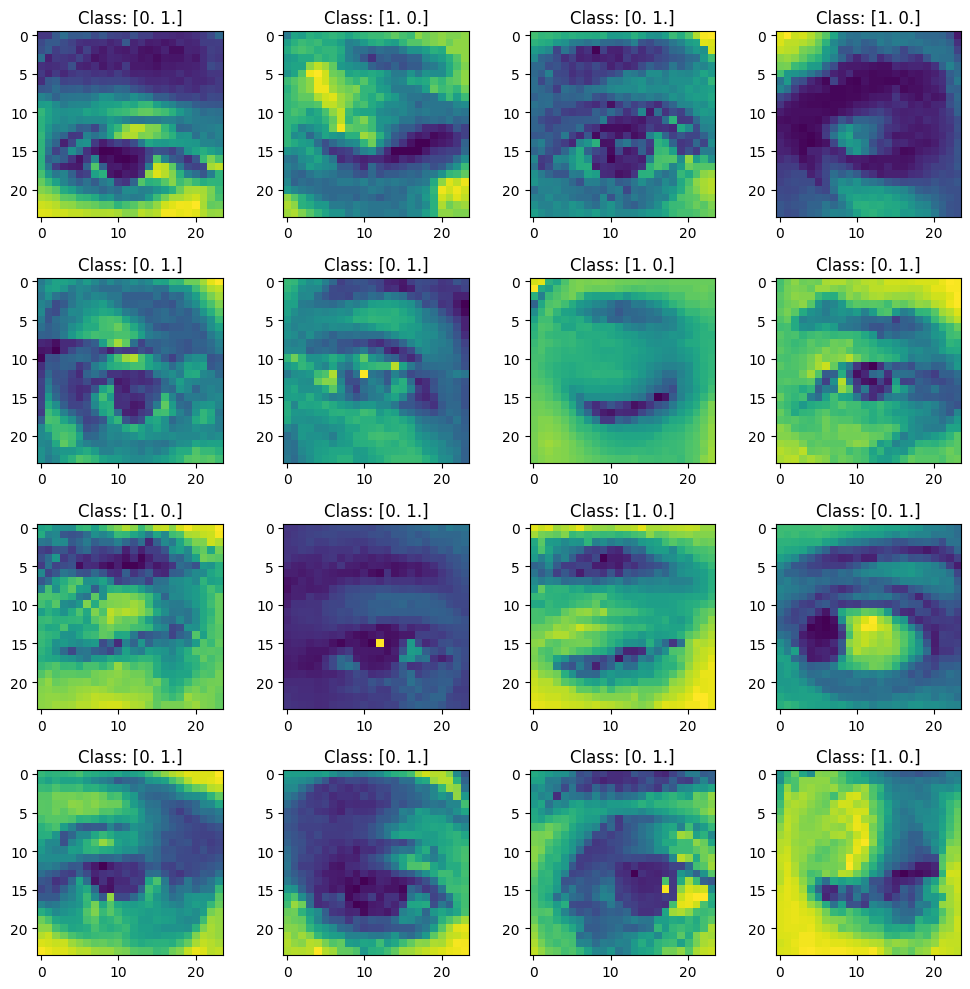

In [ ]:
images, labels = next(train_batch)

# Display the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(f"Class: {labels[i]}")
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.5),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax') #Fully connected
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_batch, validation_data=valid_batch,epochs=10)

<ipython-input-35-350c02091798>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_batch, validation_data=valid_batch,epochs=10)


Epoch 1/10
39/39 [==============================] - 11s 249ms/step - loss: 0.4149 - accuracy: 0.8225 - val_loss: 0.1717 - val_accuracy: 0.9404
Epoch 2/10
39/39 [==============================] - 10s 258ms/step - loss: 0.1793 - accuracy: 0.9335 - val_loss: 0.1216 - val_accuracy: 0.9633
Epoch 3/10
39/39 [==============================] - 11s 280ms/step - loss: 0.1227 - accuracy: 0.9506 - val_loss: 0.1031 - val_accuracy: 0.9495
Epoch 4/10
39/39 [==============================] - 11s 271ms/step - loss: 0.1010 - accuracy: 0.9603 - val_loss: 0.1155 - val_accuracy: 0.9450
Epoch 5/10
39/39 [==============================] - 11s 267ms/step - loss: 0.0837 - accuracy: 0.9708 - val_loss: 0.1016 - val_accuracy: 0.9541
Epoch 6/10
39/39 [==============================] - 11s 292ms/step - loss: 0.0584 - accuracy: 0.9716 - val_loss: 0.0917 - val_accuracy: 0.9587
Epoch 7/10
39/39 [==============================] - 11s 272ms/step - loss: 0.0420 - accuracy: 0.9838 - val_loss: 0.0800 - val_accuracy: 0.9587

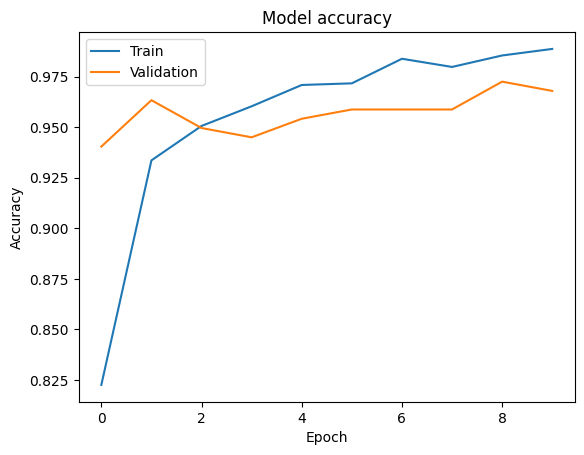

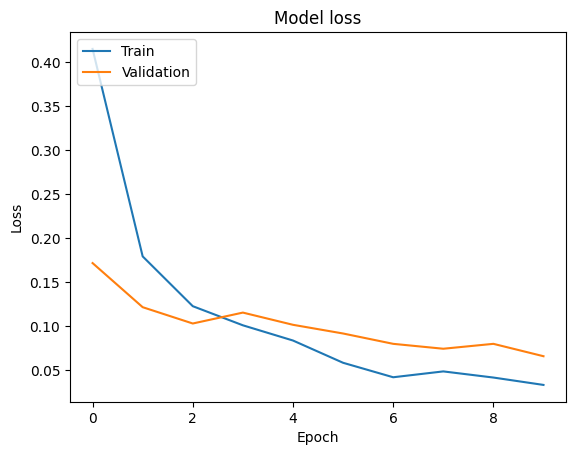

In [ ]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('cnn_classifier_2.h5', overwrite=True)